# Verification of Multiscale Theorems

### In this notebook, the multiscale method will be used to produce intervals over which changes occur in a data set with sudden changes and a data set with a gradual change.

### The following notation is used: 
- $\sigma$ is the standard deviation in the data set (independent of the sudden or gradual changes)
- $k$ is the scale parameter (indicating the size of the interval over which changes are detected)
- $t$ is the threshold for outliers in the space of amplitudes of the multiscale basis. The threshold is selected to be $t=6$ for all examples.
- $\psi$ is the test function

In [1]:
threshold = 6

### There are two different test functions used for the demonstrations.
### The piecewise constant function: 
$ \psi(x)=   \left\{\begin{array}{ll} 1 & x\in[0,1/2] \\ -1 & x\in(1/2,1] \\ \end{array} \right.  $
### The piecewise linear function: 
$ \psi(x)=   \left\{\begin{array}{ll} 1-4x & x\in[0,1/2] \\ 4x-3 & x\in(1/2,1] \\ \end{array} \right.  $

___

In [2]:
from singlescale_online_shift_mean_variance import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Example 1: Sudden Changes

### 1. Create a toy data set with two sudden changes.

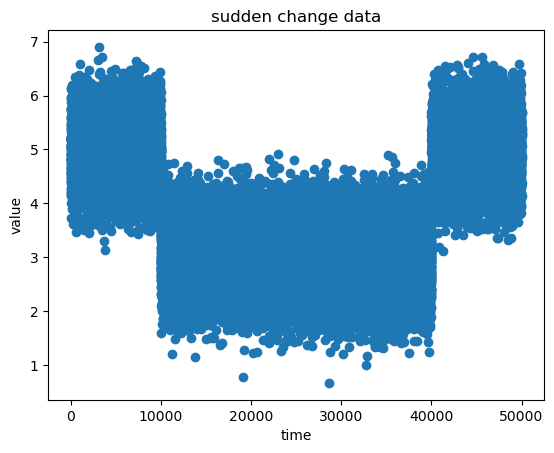

In [3]:
suddenchangedata = sudden_change_data()
plt.scatter(range(0, suddenchangedata.shape[0]), suddenchangedata)
plt.xlabel('time')
plt.ylabel('value')
plt.title('sudden change data')
plt.show()

### 2. Detect sudden changes with multiscale algorithm.

In [4]:
data = suddenchangedata

changeType = 'Sudden'

#### First, with the piecewise constant test function, the theorem indicates that the minimum scale necessary to detect a change is:
$ k > \ln \left( \frac{4t^2\sigma^2}{s^2}\right)/\ln 2 = 3.17 $
#### The location of the changes are indicated in red.

In [5]:
testfunctionType = 'PiecewiseConst'

test = constant_test
min_scale = 3
max_scale = 5

shiftscale = min_scale-2


coeff, coeff_upper, coeff_lower, anomalyInteral, anomaly = multiscalecoeff_seperatechange_online_shift(data, test, threshold, min_scale, max_scale, shiftscale)

ANOMALY: scale: 4, partition: [9990,10006], amplitude: [0.04737379], lower: [-0.04652634], upper: [0.04655843]
ANOMALY: scale: 5, partition: [9978,10010], amplitude: [0.01921388], lower: [-0.01657757], upper: [0.01660601]
ANOMALY: scale: 4, partition: [39992,40008], amplitude: [-0.05825885], lower: [-0.04682653], upper: [0.0468246]
ANOMALY: scale: 5, partition: [39978,40010], amplitude: [-0.01919795], lower: [-0.01635011], upper: [0.0163522]


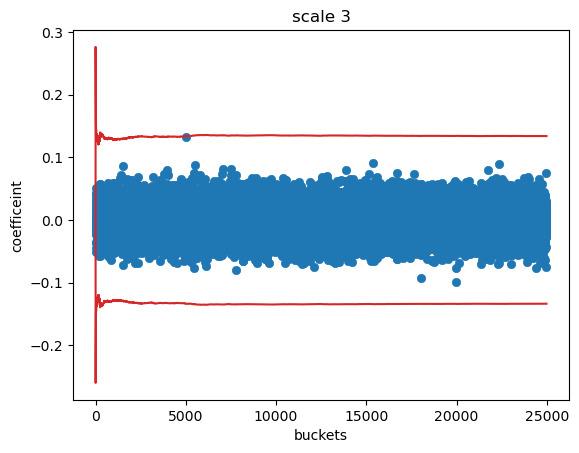

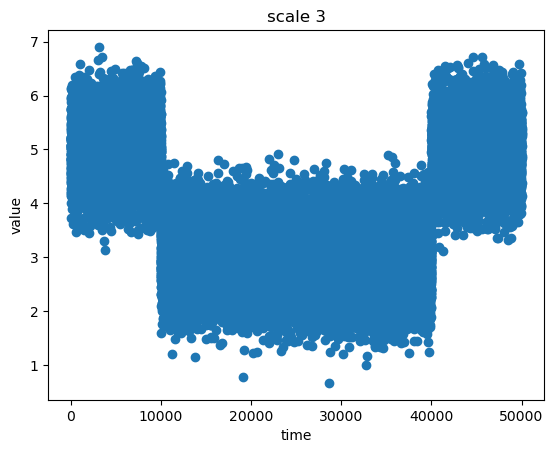

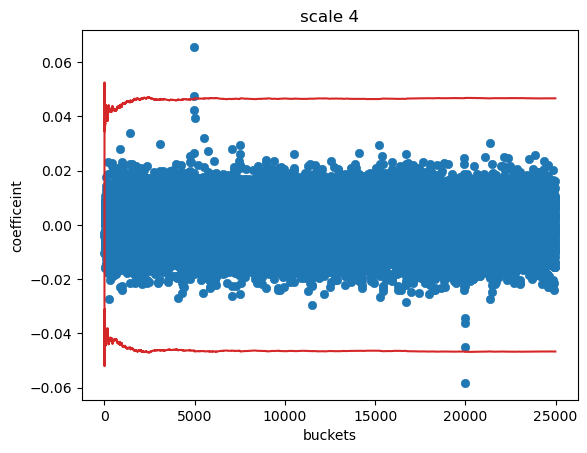

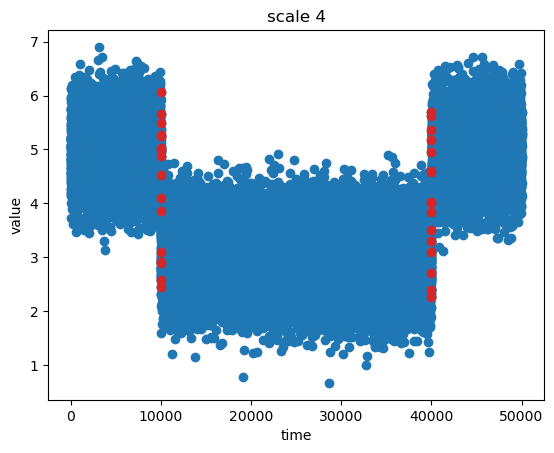

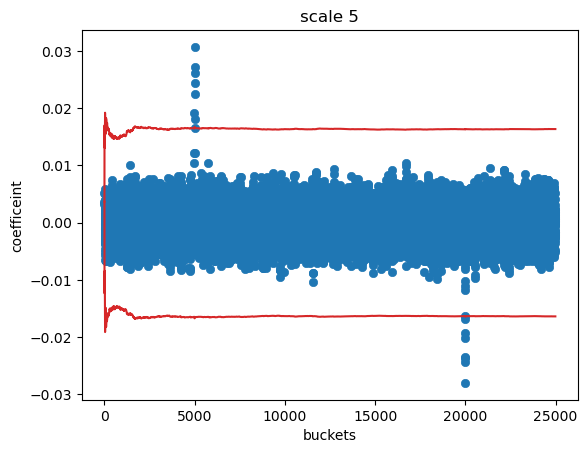

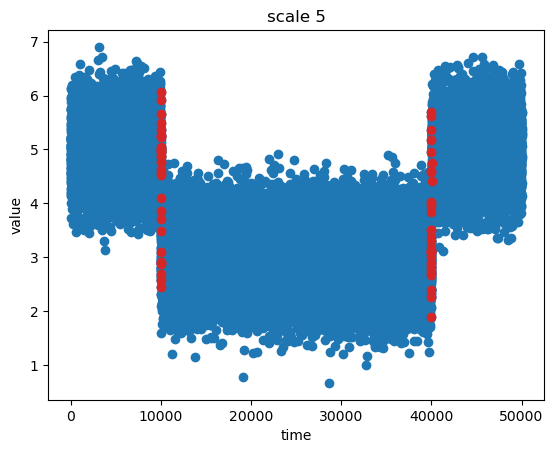

In [6]:
plot_results(data, coeff, coeff_upper, coeff_lower, anomalyInteral, min_scale, max_scale, changeType, testfunctionType)

#### Second, with the piecewise linear test function, the theorem indicates that the minimum scale necessary to detect a change is:
$k > \ln \left(\frac{64 t^2 \sigma^2}{3s^2}\right) / \ln 2 = 5.58$

In [7]:
testfunctionType = 'Piecewiselinear'

test = linear_test
min_scale = 5
max_scale = 7    

shiftscale = min_scale-2

coeff, coeff_upper, coeff_lower, anomalyInteral, anomaly = multiscalecoeff_seperatechange_online_shift(data, test, threshold, min_scale, max_scale, shiftscale)

ANOMALY: scale: 5, partition: [9992,10024], amplitude: [0.00993092], lower: [-0.00974613], upper: [0.00974758]
ANOMALY: scale: 7, partition: [9888,10016], amplitude: [-0.00137137], lower: [-0.00116926], upper: [0.00116277]
ANOMALY: scale: 7, partition: [39888,40016], amplitude: [0.00126324], lower: [-0.0012142], upper: [0.0012145]


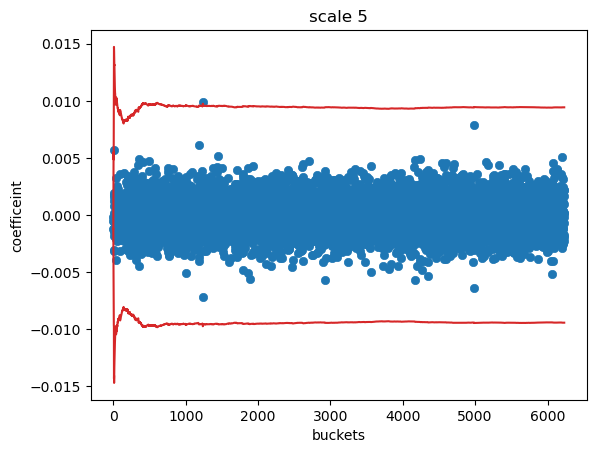

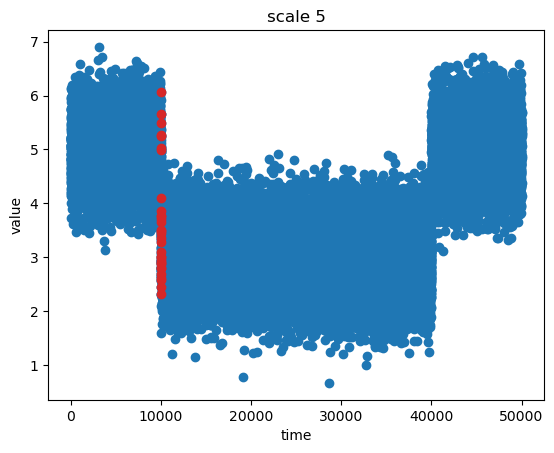

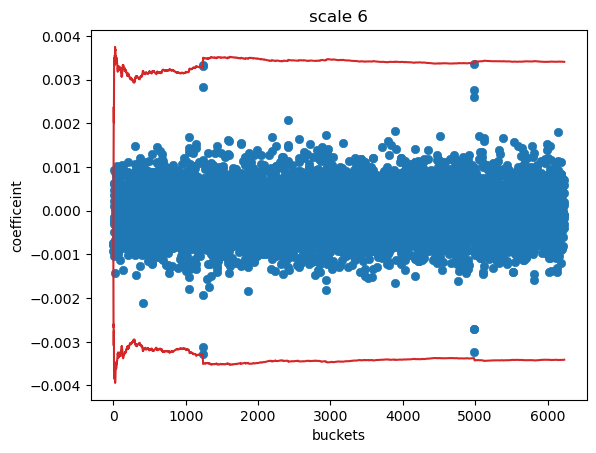

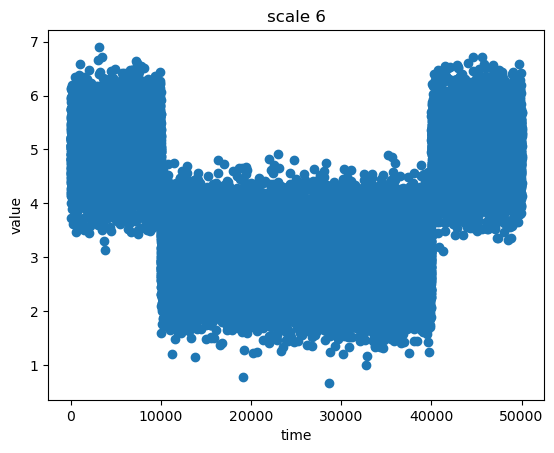

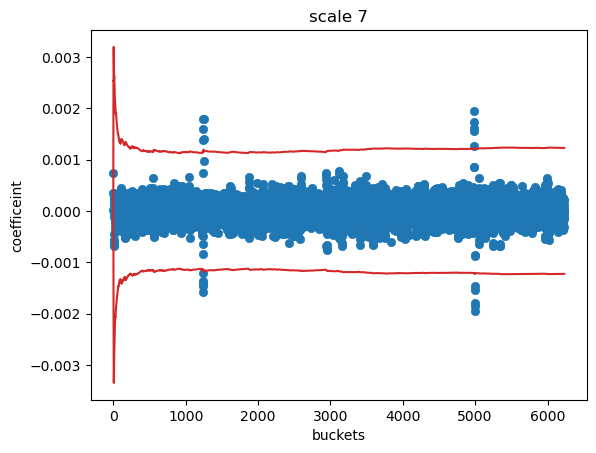

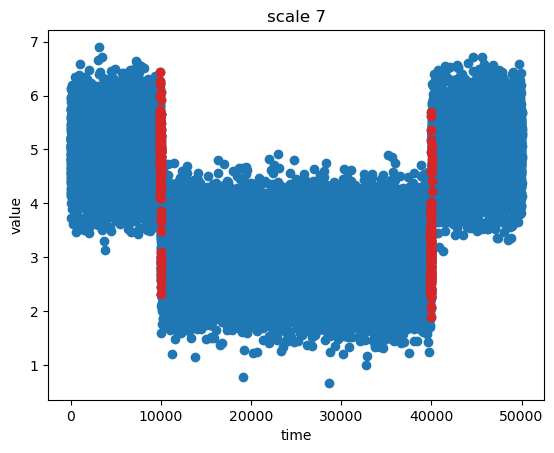

In [8]:
plot_results(data, coeff, coeff_upper, coeff_lower, anomalyInteral, min_scale, max_scale, changeType, testfunctionType)

# Example 2: Gradual Change

### 1. Create a toy data set with a gradual change.

300000


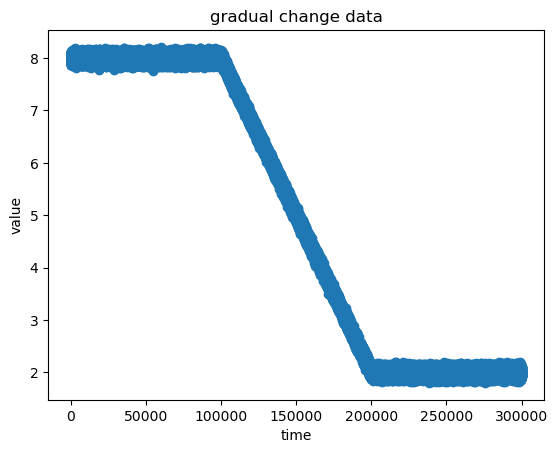

In [9]:
gradualchangedata = gradual_change_data()
print(gradualchangedata.shape[0])
plt.scatter(range(0, gradualchangedata.shape[0]), gradualchangedata)
plt.xlabel('time')
plt.ylabel('value')
plt.title('gradual change data')
plt.show()

### 2. Detect gradual change with multiscale algorithm.

In [10]:
data = gradualchangedata
changeType = 'Gradual'

#### First, with the piecewise constant test function, the theorem indicates that the minimum scale necessary to detect a change is:
$k > \frac{\ln \big( \frac{16t^2 \sigma^2}{ m^2}\big)}{3\ln 2} = 9.52$

In [11]:
testfunctionType = 'PiecewiseConst'

test = constant_test
min_scale = 9
max_scale = 10
    
    
coeff, coeff_upper, coeff_lower, anomalyInteral, anomaly = multiscalecoeff_seperatechange_online_shift(data, test, threshold, min_scale, max_scale, shiftscale)

ANOMALY: scale: 10, partition: [99672,100696], amplitude: [9.73158188e-06], lower: [-9.55857974e-06], upper: [9.58920727e-06]
ANOMALY: scale: 10, partition: [100704,101728], amplitude: [1.51632544e-05], lower: [-9.6011892e-06], upper: [9.63560551e-06]
ANOMALY: scale: 10, partition: [101736,102760], amplitude: [1.62889836e-05], lower: [-9.60597424e-06], upper: [9.64054317e-06]
ANOMALY: scale: 10, partition: [102768,103792], amplitude: [1.28016352e-05], lower: [-9.591105e-06], upper: [9.62510533e-06]
ANOMALY: scale: 10, partition: [103800,104824], amplitude: [1.53670969e-05], lower: [-9.60110007e-06], upper: [9.63547603e-06]
ANOMALY: scale: 10, partition: [104832,105856], amplitude: [1.36351058e-05], lower: [-9.59374472e-06], upper: [9.62783306e-06]
ANOMALY: scale: 10, partition: [105864,106888], amplitude: [1.64786724e-05], lower: [-9.60538353e-06], upper: [9.63988135e-06]
ANOMALY: scale: 10, partition: [106896,107920], amplitude: [1.53232293e-05], lower: [-9.59997558e-06], upper: [9.63

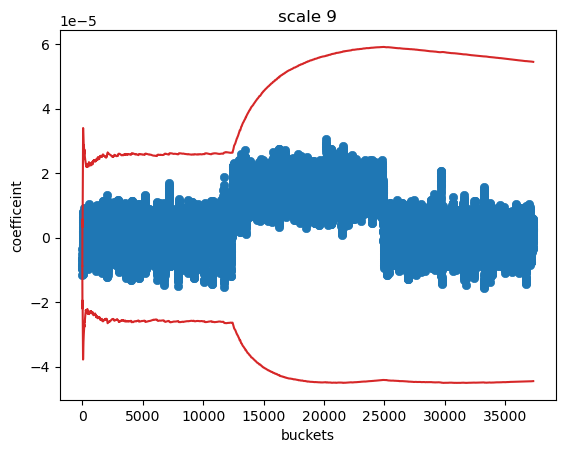

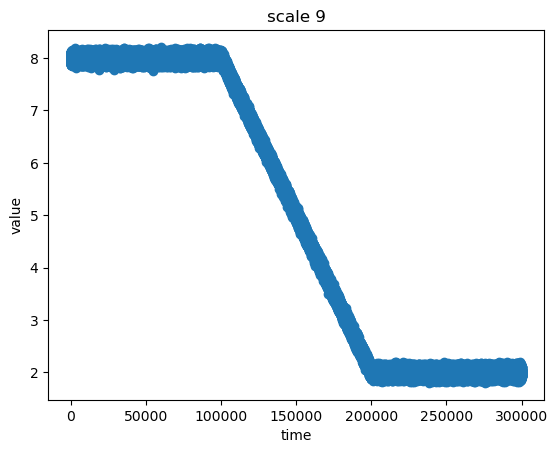

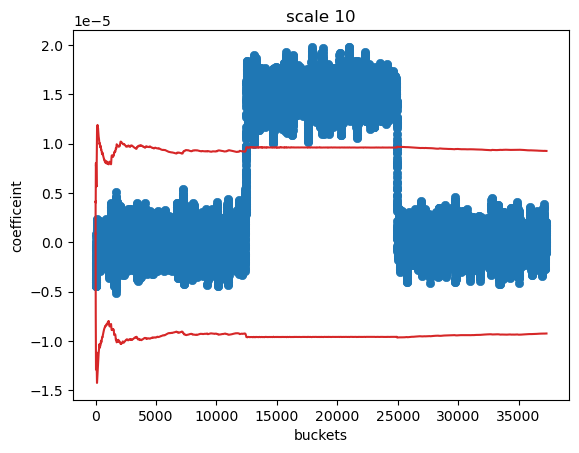

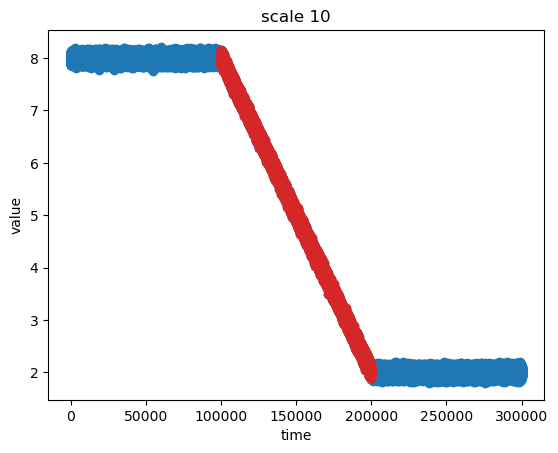

In [12]:
plot_results(data, coeff, coeff_upper, coeff_lower, anomalyInteral, min_scale, max_scale, changeType, testfunctionType)

#### Second, with the piecewise linear test function, the theorem indicates that the minimum scale necessary to detect a change is:
$k > \left\{\frac{\ln \big( \frac{1024 t^2 \sigma^2}{3 m^2}\big)}{3\ln 2}, 1\right\} = 10.9968$

In [13]:
testfunctionType = 'Piecewiselinear'

test = linear_test
min_scale = 10
max_scale = 11    
shiftscale = min_scale-2
    
    
coeff, coeff_upper, coeff_lower, anomalyInteral, anomaly = multiscalecoeff_seperatechange_online_shift(data, test, threshold, min_scale, max_scale, shiftscale)

ANOMALY: scale: 11, partition: [98816,100864], amplitude: [-2.04963192e-06], lower: [-1.93352484e-06], upper: [1.90369233e-06]
ANOMALY: scale: 11, partition: [198656,200704], amplitude: [2.0425372e-06], lower: [-1.8306343e-06], upper: [1.82685849e-06]


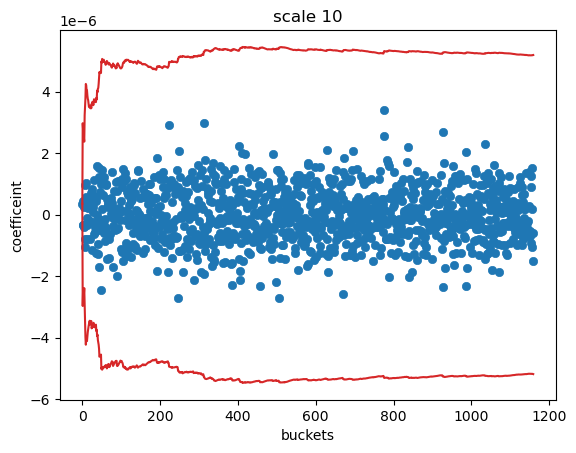

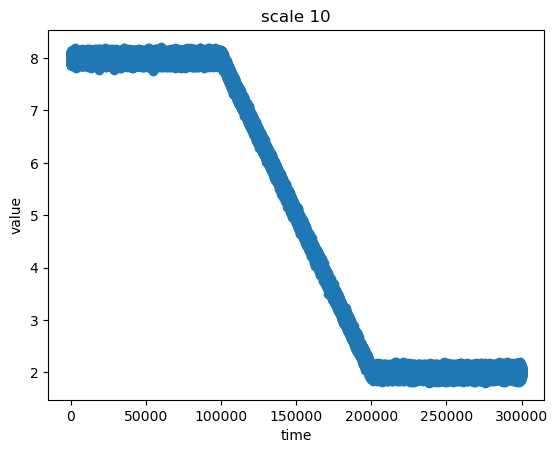

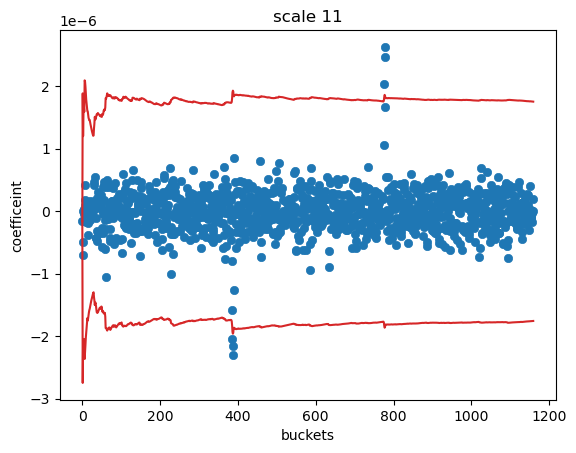

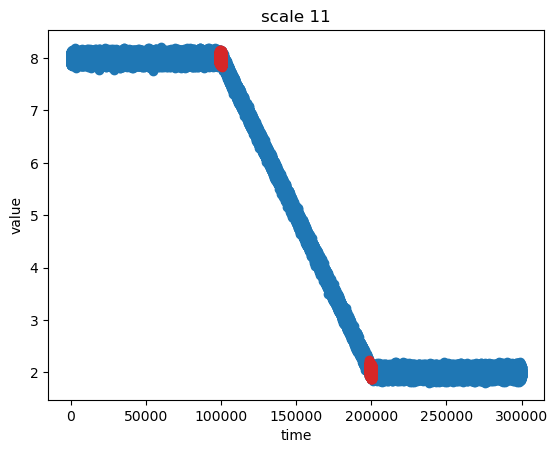

In [14]:
plot_results(data, coeff, coeff_upper, coeff_lower, anomalyInteral, min_scale, max_scale, changeType, testfunctionType)